<a href="https://colab.research.google.com/github/chacelin993/DSPS_CLin/blob/main/hw7/clusteringGenes_CLinDSPS2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install umap-learn
!pip install umap-learn[plot]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=cef08e844908d894afd3d06eecba1a1454dc9de8e7a94e37b7f1b09f29a2c3b3
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=b4daa8116ca2f8b8cd44bc7dd18c0f64f7b094477dfd179bad319cd2a35c3ae3
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.6 MB/s eta 0:00:00


In [9]:
import numpy as np
import pandas as pd
import pylab as plt
import scipy as sp
import sklearn as skl
from sklearn import cluster
import umap
import umap.plot
from scipy.cluster.hierarchy import dendrogram, linkage

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# I  read the data
in https://github.com/fedhere/DSPS_FBianco/tree/master/HW7
its called kidpackgene.csv

In [10]:
genes = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/HW7/kidpackgenes.csv')

make sure you are not reading the index as a feature! you can control this with the index_col paramter of the function pd.read_csv or remove the column after you read the data in


make sure you show the data and look at it carefully

In [11]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,...,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,...,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,...,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,...,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,...,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,...,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [12]:
genes.shape

(4224, 75)

# II  Explore and preprocess the data  explore the data.


## II a
missing values? (remember you can use the missingno package and visualize the missing values!). What should you do with them?

In [13]:
import missingno as msno

<Axes: >

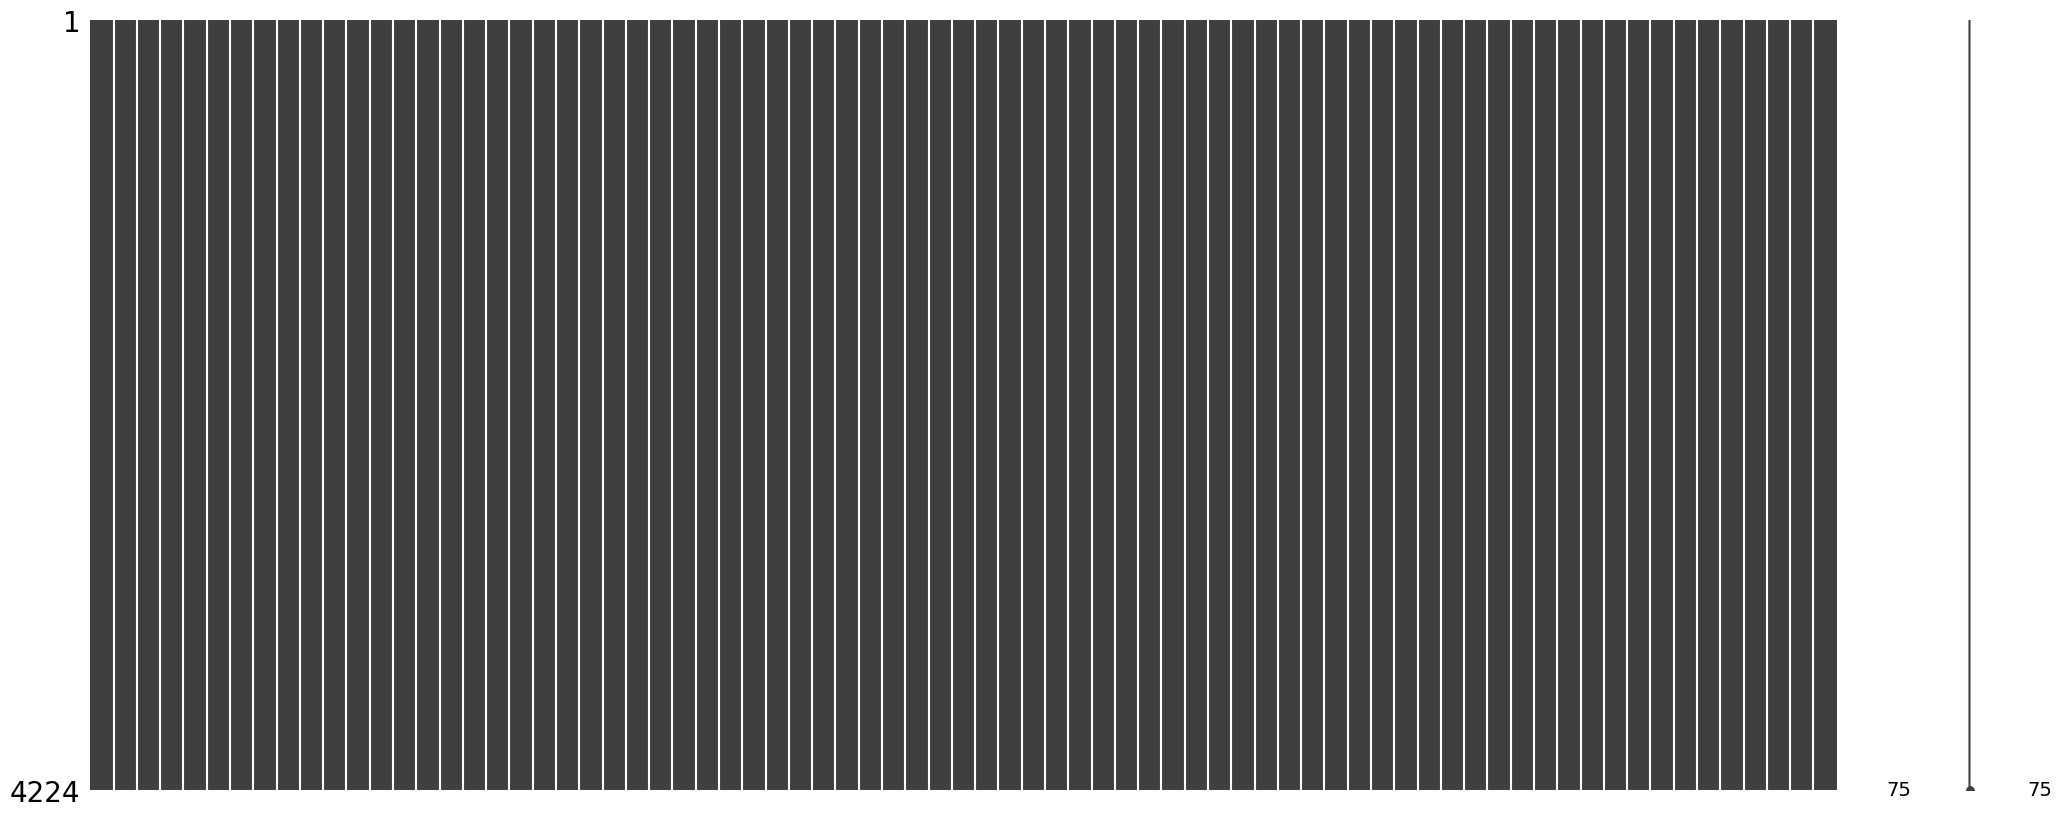

In [14]:
msno.matrix(genes)

## II b
whiten it, normalize it, scale it. What is appropriate? discuss your choices

In [15]:
pip install zca

In [16]:
from zca import ZCA
from sklearn.preprocessing import StandardScaler

In [17]:
#delete
genes_data = genes.iloc[:,1:].values
trf = ZCA().fit(genes_data)
scaledgenes = trf.transform(genes_data)
scaler = StandardScaler()
scaledgenes = scaler.fit_transform(scaledgenes)


In [18]:
scaledgenes.mean(0).round(2), scaledgenes.std(0)

(array([-0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,
         0.,  0.,  0., -0., -0., -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -0.,  0.,  0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0.,  0.,
        -0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0.,  0., -0.,
        -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
         0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1.]))

# III Visualize the data


## III-a calculate and plot a t-SNE rojection of the data on an optimal 2D plane

In [19]:
from sklearn.manifold import TSNE

In [20]:
# skl.manifold.TSNE?

The hyperparameteres perplexity and possibly early_exaggeration may significantly impact the result. Find values that give you some structure in the data. Make sure you read the docstring and info on tSNE!

In [21]:
#delete
twodproj = skl.manifold.TSNE(n_components=2, random_state=10)
genes_tsne = twodproj.fit_transform(scaledgenes)

In [22]:
genes_tsne.shape

(4224, 2)

plot the TSNE 2D projection


Text(0, 0.5, 't-SNE feature 2')

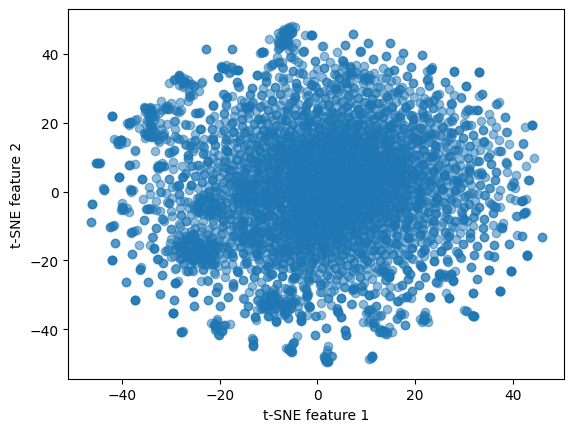

In [23]:
plt.scatter(genes_tsne[:,0], genes_tsne[:,1],alpha=0.5)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

## Figure 1: TSNE projection of the gene expression. The two features are not significantly correlated and have zero means, but there seem to be some clusters formed.

## III-b calculate and plot the UMAP 2D projection

Text(0, 0.5, 'UMAP dimension 2')

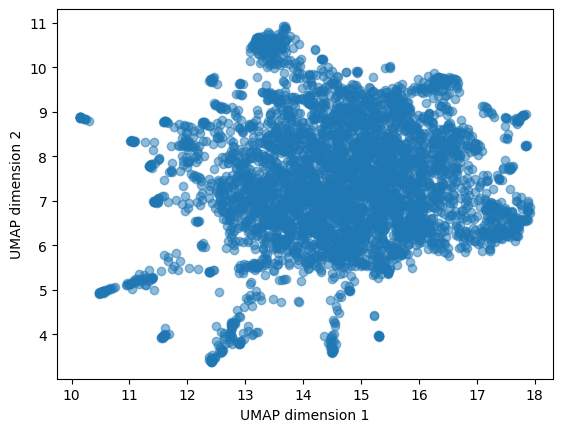

In [24]:
mapper = umap.UMAP()
genes_umap = mapper.fit_transform(scaledgenes)
plt.scatter(genes_umap[:, 0], genes_umap[:, 1], alpha=0.5)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

## Figure 1: UMAP projection of the gene expression. The two features are not significantly correlated, but there are some outliers forming lines.

# IV K-MEANS Clustering

## IV-a find the best number of culsters for this dataset

create a function that measures the intracluster variance

the intracluster variance is the sum of the variance of each cluster
$V =\sum_J \sum_i{(X_{i\in j} - \bar{X_j})^2}$ for $i$ points in $j$ clusters

In [25]:
#delete
def calICVar(X, labels):
    """calculates the intracluster variance of the k-MEANS algorithm
    X: the input data (ndarray)
    labels: the labels indicating the cluster of each datapoint: same number of data as X
    """
    icvar = 0
    for label in np.unique(labels):
      p = X[labels==label]
      m = np.mean(p, axis=0)
      icvar += np.sum((p-m)**2)
    return icvar


cluster the data with K-Means using 1 to 10 clusters. Calculate the intracluster variance and look for an "elbow" in the value of the intracluster variance as a function of number of clusters/ What is the optimal number of clusters?

In [26]:
from sklearn.cluster import KMeans

In [27]:
vars = [] #list of intracluster variance values for KMeans being run with 1->10 clusters
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaledgenes)
  labels = kmeans.labels_
  vars.append(calICVar(scaledgenes, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [28]:
 kmeans.inertia_

292429.25421759614

Text(0, 0.5, 'intracluster variance')

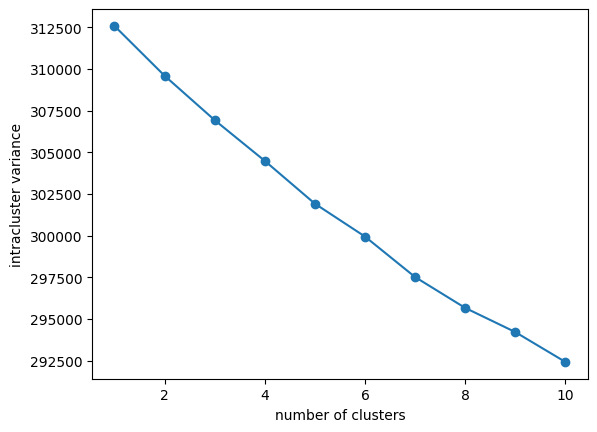

In [29]:
# elbow plot
plt.plot(range(1,11), vars, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('intracluster variance')

## Figure 3: Intracluster variances versus the number of clusters. The variances almost decrease linearly with the number of clusters with small variation in the slopes.

Based on the elbow plot above (see also slides) what is the right number of clusters for this dataset? DISCUSS!

There is not a sharp change in the slope, but I would say 7 is the right number.

## IV-b Cluster the data with k-Means into the number of clusters as determined from the elbow

In [30]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
geneclustersKM = kmeans.fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## IV-c plot and plot the t-SNE and UMAP projections of the data using the cluster number as color

Text(0, 0.5, 't-SNE feature 2')

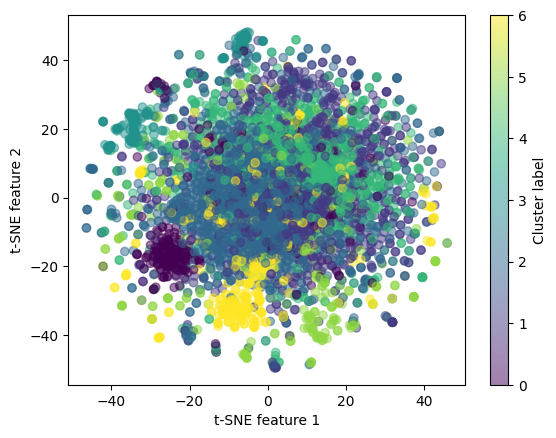

In [31]:
plt.scatter(genes_tsne[:, 0], genes_tsne[:, 1], c=geneclustersKM.labels_, cmap='viridis', alpha=0.5)
plt.colorbar(label='Cluster label')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

## Figure 4: TSNE projection of gene expression (by Vincent van Gogh) of 7 clusters. Two distinct clusters at left bottom coner are recongnized.

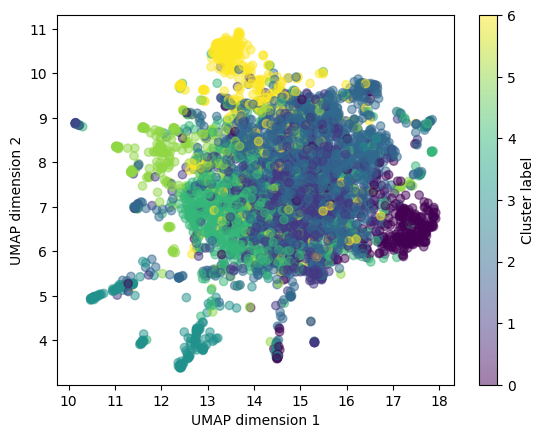

In [32]:
plt.scatter(genes_umap[:, 0], genes_umap[:, 1], c=geneclustersKM.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')
plt.colorbar(label='Cluster label')

## Figure 5: UMAP projection of gene expression (by V.V.Gogh) of 7 clusters. The yellow and gree clusters on the right make sense.

# Use DBSCAN or hierarchical clustering (461 pick either DBSCAN or hierarchical) and redo the clustering. Can you find the same number of clusters?

# V DBSCAN Clustering


## V-a measure the distribution of Euclidean distances

It is important to choose the hyperparamters of DBSCAN wisely. Initialize the _eps_ parameter of DBSCAN based on the mean Euclidean distance. To that end, calculate and plot the Euclidean distance matrix of each point pairs if you have not yet

In [33]:
from scipy.spatial.distance import pdist, squareform

In [34]:
dists = pdist(scaledgenes, 'euclidean')
dist_matrix = squareform(dists)

Text(0, 0.5, 'sample index')

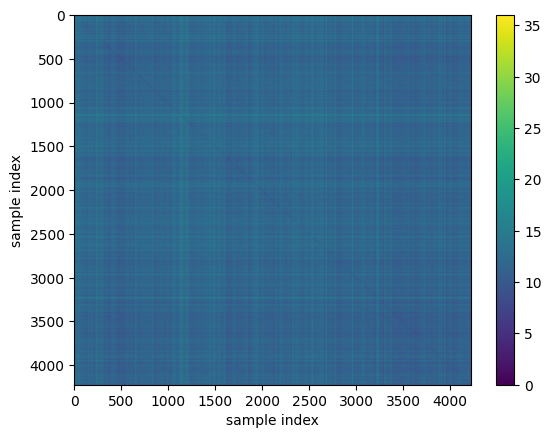

In [35]:
plt.imshow(dist_matrix, cmap='viridis', aspect='auto')
plt.colorbar()
plt.xlabel('sample index')
plt.ylabel('sample index')

## Figure 6: DBSCAN using Euclidean distances. Most points are within 15.

 make a histogram of the pairwise distances. You should choose a value to initialize dbscan that is below the mean

Text(0, 0.5, 'frequency')

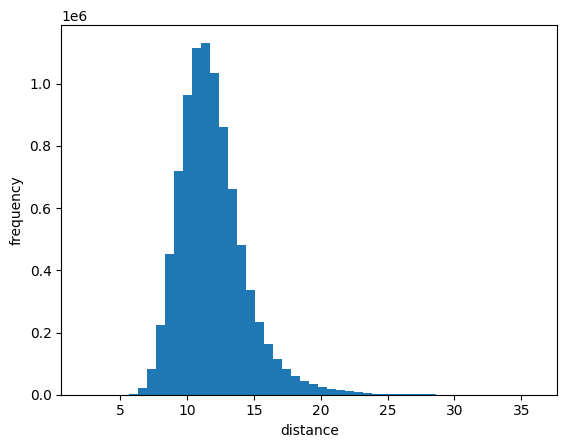

In [36]:
plt.hist(dists, bins=50)
plt.xlabel('distance')
plt.ylabel('frequency')

## Figure 7: Histogram of distances. The peak is around 12, and the distribution is askewed.

## V-b Rub DBSCAN

initialize the dbscan _eps_ hyperparameter value appropriately and fit a dbscan model to the data plot the 2D TSNE projection colorcoded as before. How many clusters do you have, how many outliers? is that a significant number?

In [37]:
from sklearn.cluster import DBSCAN

number of clusters:  5
number of outliers:  75


Text(0, 0.5, 't-SNE feature 2')

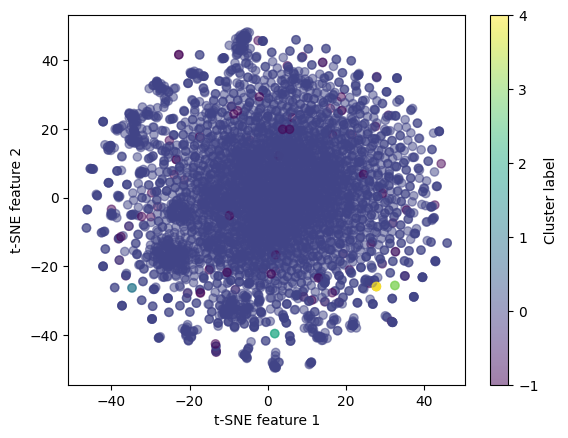

In [38]:
eps_value = 12
geneclustersDBS = DBSCAN(eps=eps_value, min_samples=2).fit(scaledgenes)
n_clusters = len(set(geneclustersDBS.labels_)) - (1 if -1 in geneclustersDBS.labels_ else 0)
n_outliers = list(geneclustersDBS.labels_).count(-1)

np.unique(geneclustersDBS.labels_)
plt.scatter(genes_tsne[:, 0], genes_tsne[:, 1], c=geneclustersDBS.labels_, cmap='viridis', alpha=0.5)
print('number of clusters: ',n_clusters)
print('number of outliers: ',n_outliers)
plt.colorbar(label='Cluster label')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

## Figure 8: TSNE projection of gene expression using DBSCAN clustering. The number of clusters is 5 and the number of outliers is 75.

## V-c plot the data in the t-SNE and UMAP projections color-coded by DBSCAN cluster

Text(0, 0.5, 'UMAP dimension 2')

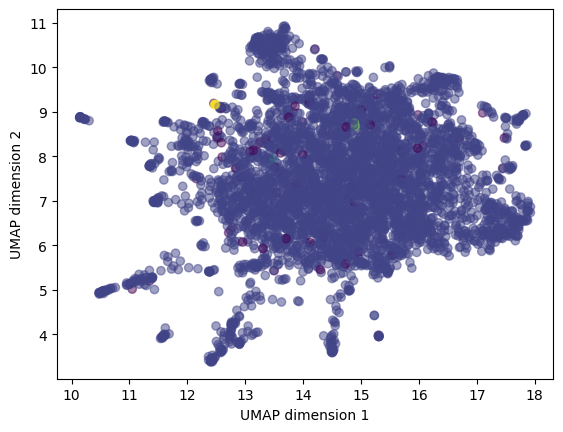

In [39]:
plt.scatter(genes_umap[:, 0], genes_umap[:, 1], c=geneclustersDBS.labels_, cmap='viridis', alpha=0.5)
plt.xlabel('UMAP dimension 1')
plt.ylabel('UMAP dimension 2')

## Figure 8: UMAP projection of gene expression using DBSCAN clustering. The number of clusters and outliers is the same as FIG.7



# VI Agglomerative clustering


## VI-a run agglomerative clustering with standard distance choices: ward linkage and Euclidean distance

In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
clusteringAg = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', distance_threshold=11)
clusteringAg.fit(scaledgenes)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', distance_threshold=11,
                        n_clusters=None)

choose ward linkage and plot the dendrogram of the clusters

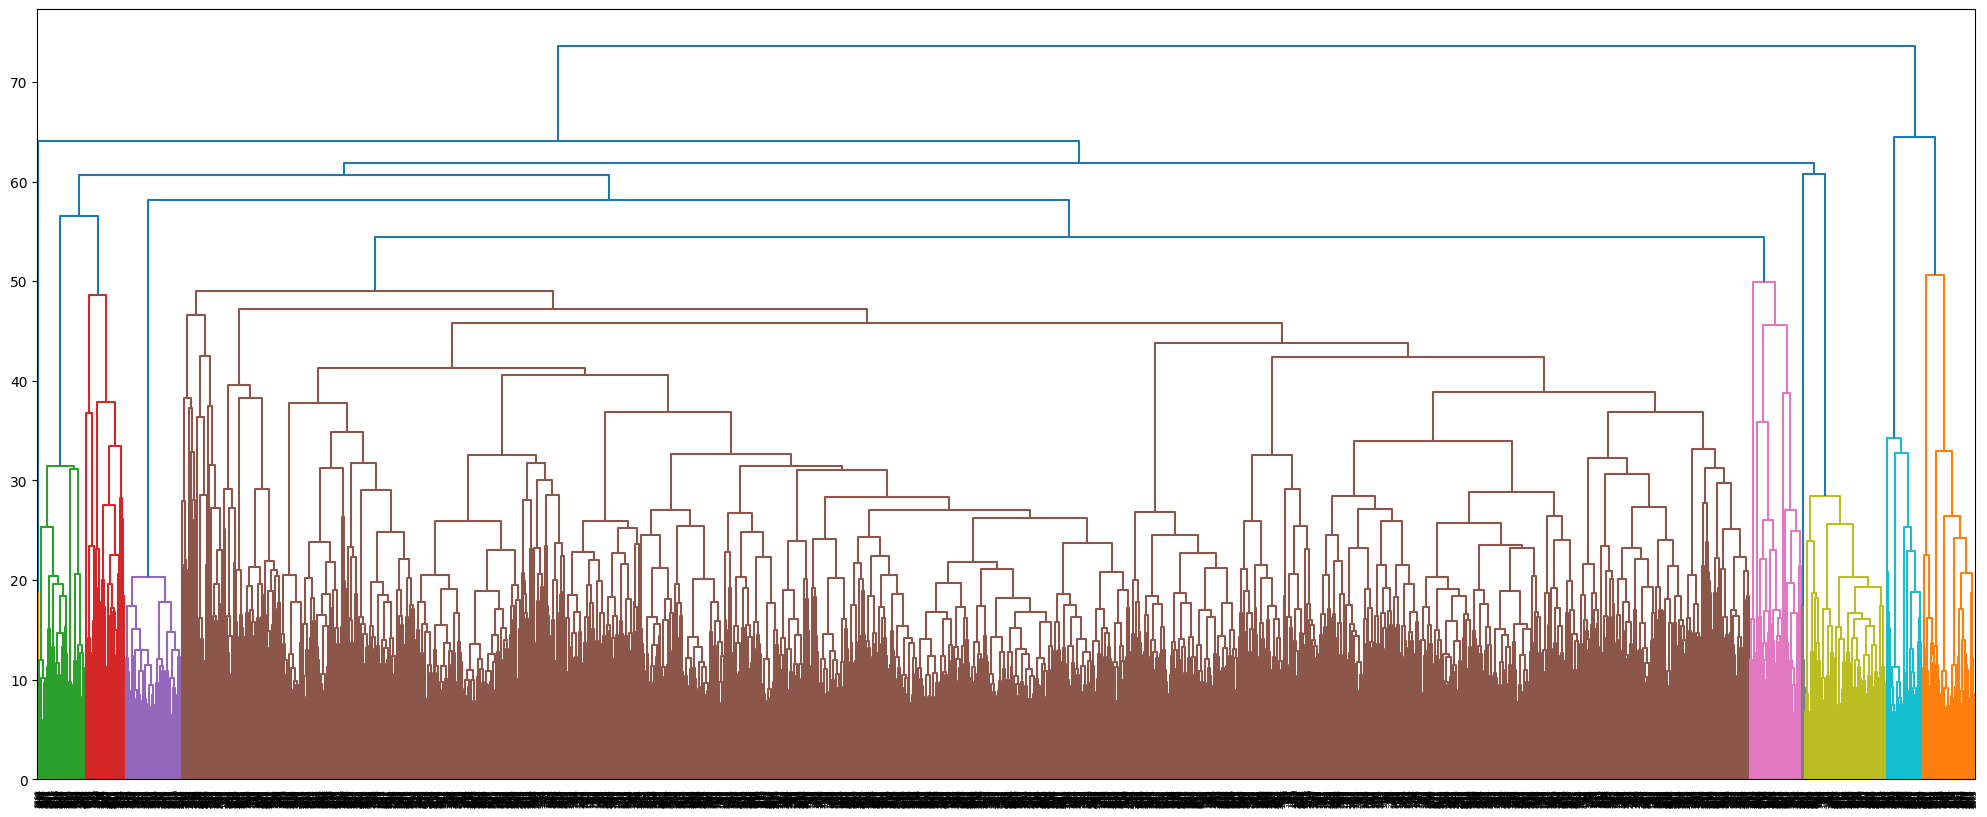

In [42]:
Z = linkage(scaledgenes, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## Figure 9: agglomerative clustering using linkage method of ward. The cutoff is set to 11. There are 9 clusters.

repeat with a different linkage and comment on differences

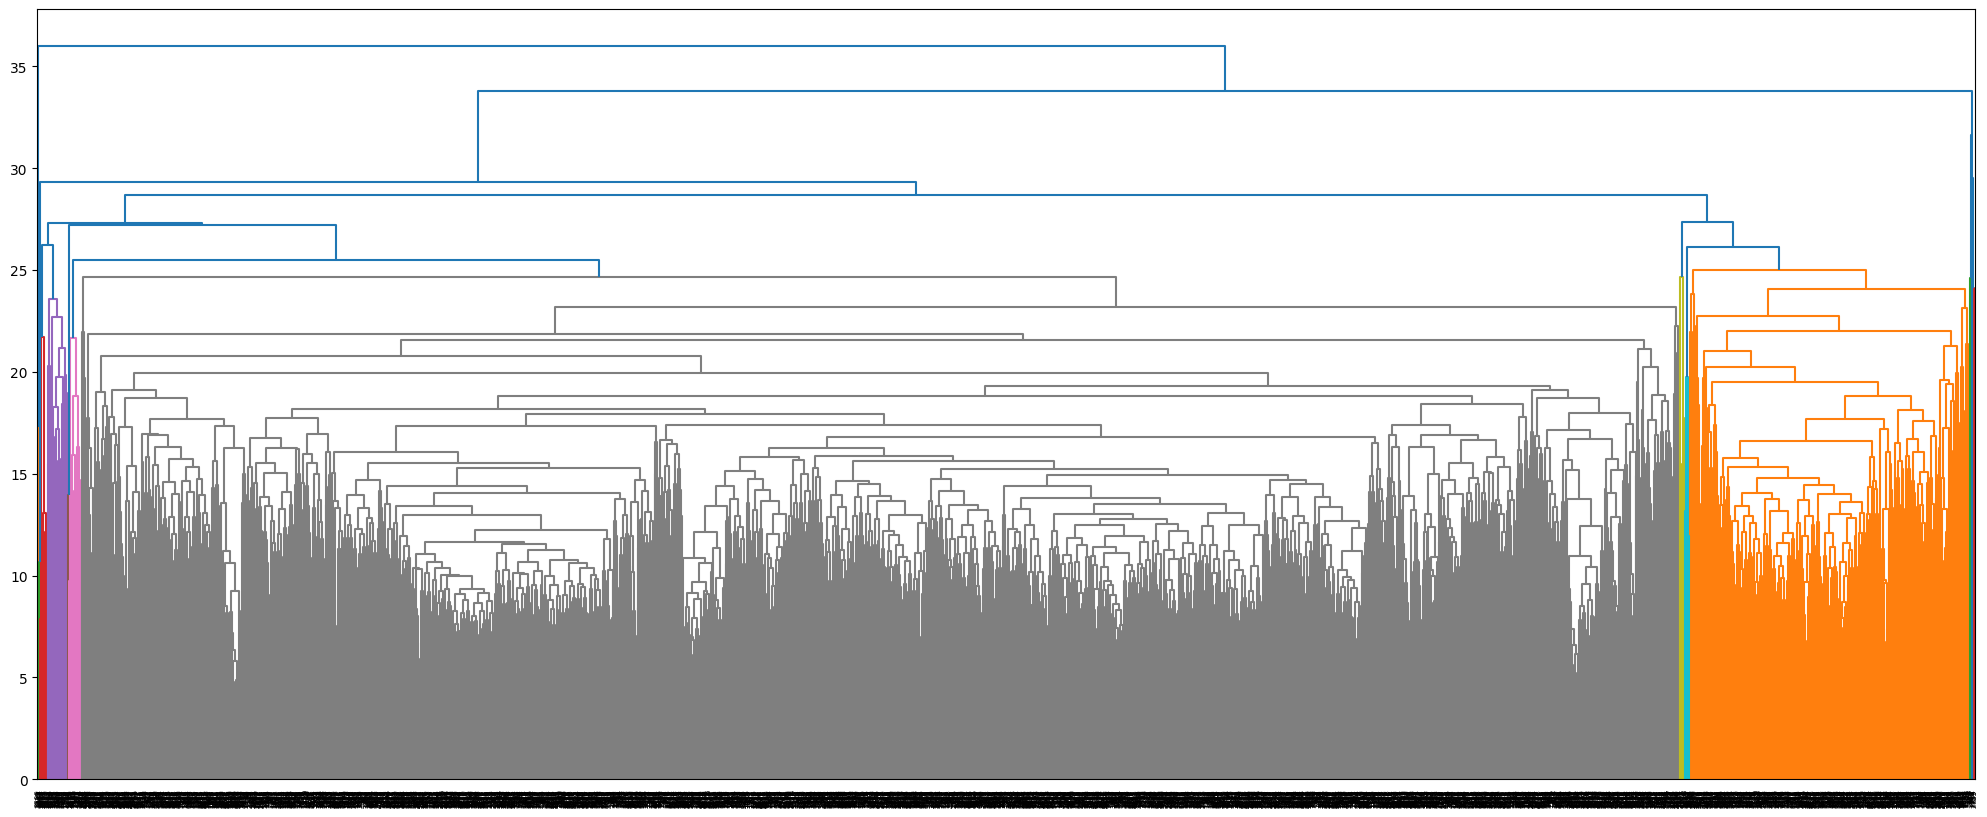

In [43]:
Z = linkage(scaledgenes, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

## Figure 10: agglomerative clustering using linkage method of complete. The cutoff is set to 11. There are 9 clusters.

# VI-b rerun agglomerative cluatering to get the "ideal" number of clusters as decided by k-means.



In [44]:
n_clusters = 7
geneclustersAg = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
geneclustersAg.fit(scaledgenes)
cluster_labels=geneclustersAg.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## VI-c plot the 2D TSNE projection colorcoded as before

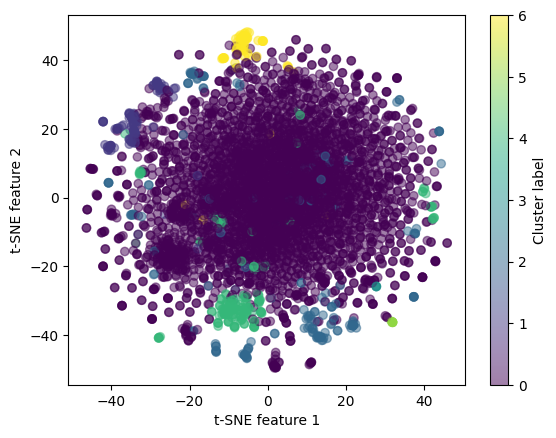

In [45]:
plt.scatter(genes_tsne[:, 0], genes_tsne[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Cluster label')

## Figure 11: TSNE projection using agglomerative cluatering.

# VII Comment, in the spirit of https://www.ncbi.nlm.nih.gov/pmc/articles/PMC187526, which was the most "useful" method for clustering

## Each method has its pros and cons. But given a general consideration on the balance of stability and efficiency, I would say DBSCAN is the most useful method. The runtime is not long, and given the same choice of parameters it would yield stable results. Agglomerative takes very long and K-mean is quite sensitive to the initialization.